In [1]:
# Import Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\dev\anaconda3\envs\data_py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

198088     82500.0
715169     78500.0
362690     74000.0
761955    100000.0
140251     90000.0
175142    217550.0
151943     90000.0
656338    100000.0
149980    132500.0
477916     95000.0
Name: salary_year_avg, dtype: float64

<Axes: >

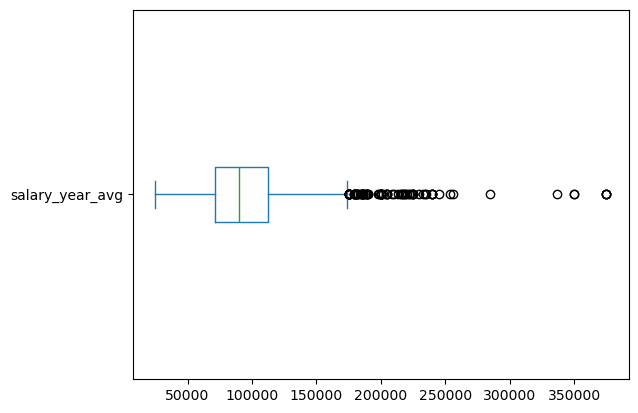

In [5]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\dev\AppData\Local\Temp\ipykernel_4876\1996236615.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


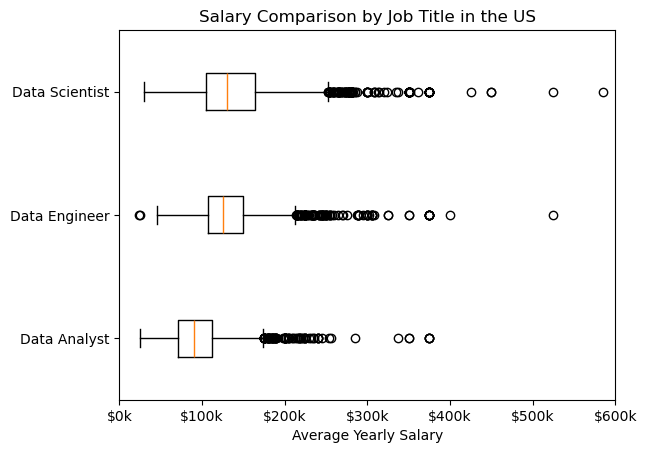

In [11]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Comparison by Job Title in the US')
plt.xlabel('Average Yearly Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.show()